In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Visualization Review: Welcome Survey ##

In [2]:
#Sleep Survey Table 

survey = Table.read_table('welcome_survey_v1.csv')
survey

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
4,6,4,Both,I don't know,On your back
8,6,7,Both,I don't know,On your back
9,6,7,Both,I don't know,On your back
2,3,6.75,Left-handed,I don't know,On your back
7,10,7,Left-handed,I don't know,On your back
8,50,8,Left-handed,I don't know,On your back
4,5,10,Left-handed,I don't know,On your back
7,2,5,Right-handed,I don't know,On your back
3,7,5,Right-handed,I don't know,On your back
6,8,5.5,Right-handed,I don't know,On your back


### Categorical Bar Charts

In [3]:
#Bar graphs display catergorical variables!
#Also catergorical distributions

#Display distribution of handedness!
#Then graph it 
handedness = survey.group('Handedness')
handedness

Handedness,count
Both,18
Left-handed,100
Right-handed,1209


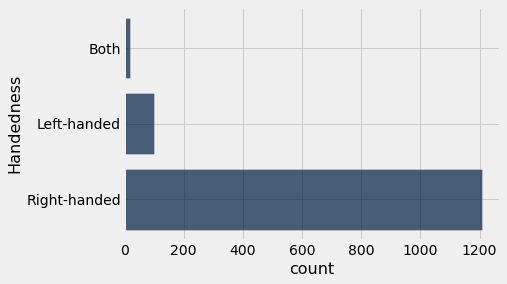

In [4]:
handedness.barh('Handedness')

### Numerical Histograms

In [17]:
#Numerical distributions are visualized by histograms
#Make a numerical distribtion for extraversion factor

bins = np.arange(1,11,2)
survey.bin('Extraversion',bins=bins)

bin,Extraversion count
1,68
3,331
5,360
7,547
9,0


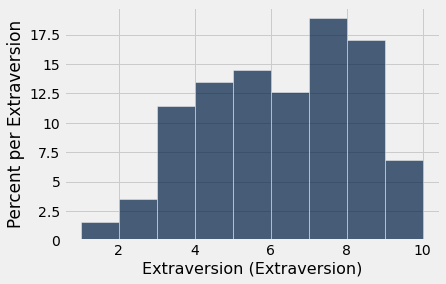

In [16]:
#visualize the distribtion

survey.hist('Extraversion',bins =bins,unit='Extraversion')

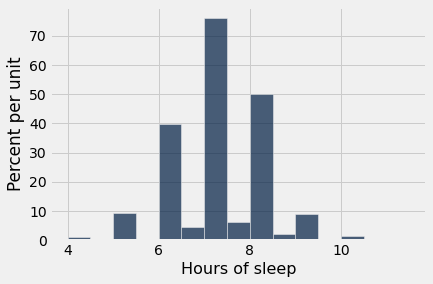

In [30]:
# Lets make another histogram
# we will look at the distribution of the number of hours of sleep
# bins = (4,12,.5)

sleep_bins = np.arange(4,12,.5)
survey.hist('Hours of sleep', bins=sleep_bins)

In [31]:
#show numerical distribution
survey.bin('Hours of sleep', bins=sleep_bins)

bin,Hours of sleep count
4,8
4.5,1
5,61
5.5,2
6,263
6.5,29
7,503
7.5,41
8,332
8.5,14


In [39]:
#count total number of indiviuals in experiment
total=survey.bin('Hours of sleep', bins=sleep_bins).column('Hours of sleep count')
sum(total)

1324

In [32]:
#Find area of bar for 6 hours of sleep
area = 263/(sum(total)) * 100
area

19.86404833836858

In [37]:
#Find Height of bar for 6 hours of sleep
area / (.5)

39.72809667673716

## Histogram Review: Heights and Heredity ##

In [40]:
#We will start to make predictions about the future. 

#If we are trying to predict an outcome for a particular individual 
#we will base the predictions on the outcomes of similar individuals.

#Sir Francis Galton studied how physical characteristics are passed
#down from one generation to the next.



galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


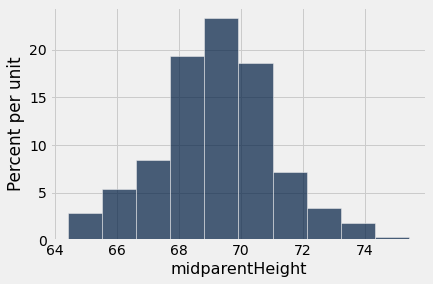

In [41]:
# We will be working with this data set
# To predict heights of children based on their parents height

# Lets visalize the midparent height
galton.hist('midparentHeight')

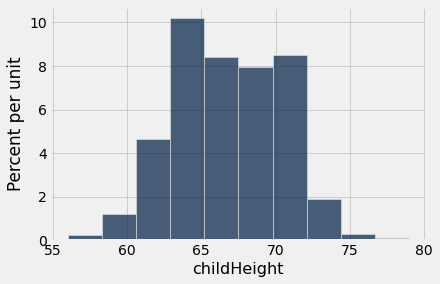

In [42]:
# Lets view the child height
# Roughly follows the parents height
galton.hist('childHeight')

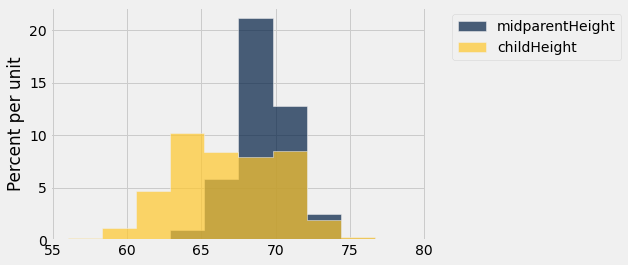

In [43]:
# we can compare the childs height vs the midparent height
# using histograms

# table.hist('distribution1','distribution2')

galton.hist('midparentHeight', 'childHeight')

## Functions ##

In [46]:
# Make a function that triples a number
def triple(x):
    return 3 * x

In [47]:
#try to use your function 
triple(3)

9

In [48]:
num = 4

In [49]:
triple(num)

12

In [50]:
triple(num * 5)

60

### Note About Scopes

In [51]:
# Note variables defined in functions are only usable in the function
# Calling it outside will produce error
x

NameError: name 'x' is not defined

In [52]:
# You can declare the same name outside a function and then use it  
x = 5

In [53]:
triple(2 * x)

30

### Type Agnostic

In [56]:
# python accepts any type for function arguments

#try string input
triple('ha')

#try array input
triple(np.arange(4))

array([0, 3, 6, 9])

In [55]:
# however the operations in the function must be defined on the data type
triple(galton)

TypeError: unsupported operand type(s) for *: 'int' and 'Table'

### Discussion Question

In [29]:
def f(s):
    return np.round(s / sum(s) * 100, 2)

array([10., 20., 30., 40.])

array([ 0.4 , 84.52, 15.08])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [32]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [33]:
hypotenuse(9, 12)

15.0

In [34]:
hypotenuse(2, 2)

2.8284271247461903

## Apply ##

In [57]:
# here is a table 

ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [58]:
# this function finds min between input and 1980
def cap_at_1980(x):
    return min(x, 1980)

In [59]:
cap_at_1980(1975)

1975

In [60]:
cap_at_1980(1991)

1980

In [61]:
#use apply to find the who was born before 1980
ok=ages.apply(cap_at_1980, 'Birth Year')


array([1980, 1980, 1967, 1904], dtype=int64)

In [65]:
# Lets try a function with mutliple arguments
def name_and_age(name, year):
    age = 2021 - year
    return name + ' is ' + str(age)

In [66]:
# apply name and age and add it to the table
ok=ages.apply(name_and_age, 'Person', 'Birth Year')
ages.with_column('name and age',ok)

Person,Birth Year,name and age
Jim,1985,Jim is 36
Pam,1988,Pam is 33
Michael,1967,Michael is 54
Creed,1904,Creed is 117
